<a href="https://colab.research.google.com/github/rrizwan98/Amazon_Reviews/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/amazon.zip'
with ZipFile (file_name,'r')as zip:
  zip.extractall()
  print('raza')

raza


In [ ]:
import numpy as np
import pandas as pd
import bz2


In [ ]:
train_file=bz2.BZ2File('/content/train.ft.txt.bz2')
test_file=bz2.BZ2File('/content/test.ft.txt.bz2')
train_file

In [ ]:
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()


In [ ]:
num_train = 80000  # We're training on the first 800,000 reviews in the dataset
num_test = 20000  # Using 200,000 reviews from test set

train_file = [x.decode('utf-8') for x in train_file_lines[:num_train]]
test_file = [x.decode('utf-8') for x in test_file_lines[:num_test]]
#train_file

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

In [ ]:
print('train_lines:',str(len(train_file_lines)))
print('test_lines:',str(len(test_file_lines)))

train_lines: 3600000
test_lines: 400000


In [ ]:
import re
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

# Some simple cleaning of data
for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])

# Modify URLs to <url>
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [ ]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)
train_labels.shape

(80000,)

In [ ]:
#train Tokenizer
from keras_preprocessing import text , sequence
max_feture=2000
maxlen=30

tokenizer=text.Tokenizer(num_words=max_feture)
tokenizer.fit_on_texts(train_sentences)

x_train=tokenizer.texts_to_sequences(train_sentences)
x_test=tokenizer.texts_to_sequences(test_sentences)



In [ ]:
#test Tokenizer
#tokenizer.fit_on_texts(test_sentences)
from keras.preprocessing.sequence import pad_sequences
MAX_LENGTH = max(len(train_sequence) for train_sequence in x_train)
print(MAX_LENGTH)
x_train=pad_sequences(x_train,maxlen=MAX_LENGTH)
x_test=pad_sequences(x_test , maxlen=MAX_LENGTH)
x_train.shape
train_labels.shape

233


(80000,)

In [ ]:
from keras.layers import Dense , Embedding , Flatten ,LSTM , Dropout ,Conv1D , MaxPool1D
from keras.models import Model , Sequential
from tensorflow.python.keras import models, layers, optimizers
def build_model():
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(max_feture, 128)(sequences)
    x = layers.Conv1D(32, 7, activation='relu')(embedded)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(3)(x)
    x = layers.Conv1D(64, 7, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(128, 7, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
model=build_model()

In [ ]:
history=model.fit(
    x_train, 
    train_labels, 
    batch_size=64,
    epochs=10,
    validation_split=0.5 )

Epoch 1/10
625/625 [==============================] - 8s 13ms/step - loss: 0.4119 - binary_accuracy: 0.8065 - val_loss: 0.3291 - val_binary_accuracy: 0.8667
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2663 - binary_accuracy: 0.8900 - val_loss: 0.3082 - val_binary_accuracy: 0.8716
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2003 - binary_accuracy: 0.9217 - val_loss: 0.4052 - val_binary_accuracy: 0.8566
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1425 - binary_accuracy: 0.9455 - val_loss: 0.8906 - val_binary_accuracy: 0.7815
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1050 - binary_accuracy: 0.9599 - val_loss: 0.5265 - val_binary_accuracy: 0.8482
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0814 - binary_accuracy: 0.9700 - val_loss: 0.5325 - val_binary_accuracy: 0.8638
Epoch 7/10
625/625 [==============================] - 8s 1

<Figure size 432x288 with 0 Axes>

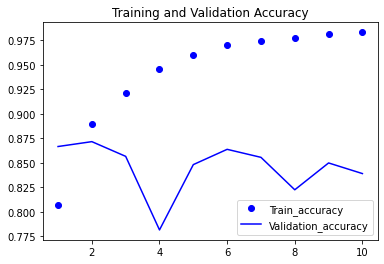

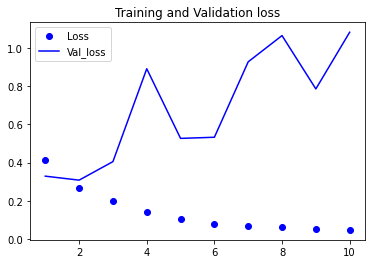

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs , acc , 'bo' , label='Train_accuracy')
plt.plot(epochs , val_acc , 'b' ,label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo' ,label='Loss')
plt.plot(epochs , val_loss , 'b', label='Val_loss')
plt.title('Training and Validation loss')
plt.legend()

plt.figure()

In [ ]:
# using LSTM
from keras.layers import LSTM , Dropout
model=Sequential()
model.add(Embedding(max_feture , 64))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(
    x_train, 
    train_labels, 
    batch_size=128,
    epochs=10,
    validation_split=0.2 )




Epoch 1/10
500/500 [==============================] - 8s 17ms/step - loss: 0.3746 - acc: 0.8399 - val_loss: 0.2988 - val_acc: 0.8762
Epoch 2/10
500/500 [==============================] - 8s 16ms/step - loss: 0.2752 - acc: 0.8905 - val_loss: 0.2789 - val_acc: 0.8849
Epoch 3/10
500/500 [==============================] - 8s 17ms/step - loss: 0.2531 - acc: 0.8984 - val_loss: 0.2654 - val_acc: 0.8904
Epoch 4/10
500/500 [==============================] - 8s 16ms/step - loss: 0.2392 - acc: 0.9050 - val_loss: 0.2596 - val_acc: 0.8955
Epoch 5/10
500/500 [==============================] - 8s 16ms/step - loss: 0.2296 - acc: 0.9089 - val_loss: 0.2584 - val_acc: 0.8999
Epoch 6/10
500/500 [==============================] - 8s 16ms/step - loss: 0.2198 - acc: 0.9139 - val_loss: 0.2527 - val_acc: 0.8991
Epoch 7/10
500/500 [==============================] - 8s 16ms/step - loss: 0.2108 - acc: 0.9190 - val_loss: 0.2604 - val_acc: 0.8913
Epoch 8/10
500/500 [==============================] - 8s 16ms/step - 

<Figure size 432x288 with 0 Axes>

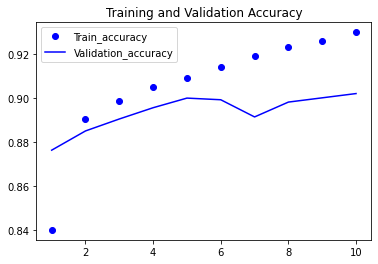

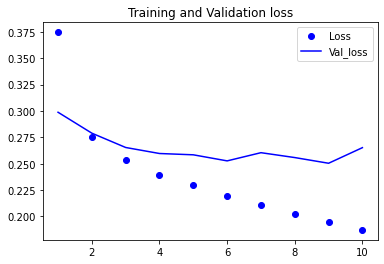

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs , acc , 'bo' , label='Train_accuracy')
plt.plot(epochs , val_acc , 'b' ,label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo' ,label='Loss')
plt.plot(epochs , val_loss , 'b', label='Val_loss')
plt.title('Training and Validation loss')
plt.legend()

plt.figure()